#### Import Libraries

In [3]:
import numpy as np 
import pandas as pd 
import json
import os
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#!conda install -c conda-forge folium=0.5.0 --yes
#pip3 install folium
!pip install folium
import folium # map rendering library
import requests
from pandas.io.json import json_normalize 
# import k-means from clustering stage
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors


     |████████████████████████████████| 94 kB 4.8 MB/s  eta 0:00:01


### Load the data 


In [4]:
print(os.getcwd())
'''
# Load the data 
df = pd.read_csv('Downloads\\uscities.csv')
#print(df.head())
df = df[['city', 'state_name', 'county_fips', 'county_name', 'lat', 'lng', 'population', 'density']] # Selected columns filtered
cal_df = df.loc[df.state_name == 'California'].reset_index() # Select only cities in California
#print(cal_df)
cal_df.sort_values(by='population', ascending=False, inplace=True)
cal_df'''


'''df_sf = pd.read_html('http://www.healthysf.org/bdi/outcomes/zipmap.htm')[3]
df_sf.columns = df_sf.iloc[0]
df_sf.drop(df_sf.index[0]).reset_index(drop=True)'''

#------------------------------
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b03ca8f1966141d7b311d322dc998b83 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Tk_MdIijOp4FPW1rTtyPIRb6ndo7NE_9TbzEYtn3vTtk',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_b03ca8f1966141d7b311d322dc998b83.get_object(Bucket='capstonethebattleofneighborhoods-donotdelete-pr-sp2zf43zdzdrbd',Key='2010_Census_Populations_by_Zip_Code.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_la1 = pd.read_csv(body)
df_la1.head()
#-------------------------------



#df_la1 = pd.read_csv('Downloads\\2010_Census_Populations_by_Zip_Code.csv')
'''df_la2 = pd.read_html('https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?zip=902')[3]
print(df_la1.shape)
print(df_la2.shape)
lacities = [df_la1, df_la2]

df_la = pd.concat(df_la1, sort=False)
df_la.reset_index(drop=True)'''
#print(df_la1.dtypes)
print(df_la1)

#-----------------------------------------


/home/wsuser/work
     Zip Code  Total Population  Median Age  Total Males  Total Females  \
0       91371                 1        73.5            0              1   
1       90001             57110        26.6        28468          28642   
2       90002             51223        25.5        24876          26347   
3       90003             66266        26.3        32631          33635   
4       90004             62180        34.8        31302          30878   
..        ...               ...         ...          ...            ...   
314     93552             38158        28.4        18711          19447   
315     93553              2138        43.3         1121           1017   
316     93560             18910        32.4         9491           9419   
317     93563               388        44.5          263            125   
318     93591              7285        30.9         3653           3632   

     Total Households  Average Household Size  
0                   1            

In [21]:
print('There are {} unique zip codes.'.format(len(df_la1['Zip Code'].unique())))

# Dropping last 2 columns as we are not using them

df_la1.drop(columns = ["Total Households", "Average Household Size"], inplace=True)
df_la1

There are 319 unique zip codes.


,Zip Code,Total Population,Median Age,Total Males,Total Females
0,91371,1,73.5,0,1
1,90001,57110,26.6,28468,28642
2,90002,51223,25.5,24876,26347
3,90003,66266,26.3,32631,33635
4,90004,62180,34.8,31302,30878
...,...,...,...,...,...
314,93552,38158,28.4,18711,19447
315,93553,2138,43.3,1121,1017
316,93560,18910,32.4,9491,9419
317,93563,388,44.5,263,125


In [5]:
address = 'Los Angeles'

geolocator = Nominatim(user_agent="LA_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.242766.


In [23]:
# create a map of Los Angeles 

map_la = folium.Map(location=[latitude, longitude], zoom_start = 11)
# add markers to map
'''for zzip, label in zip(df_la1['Zip Code'], df_la1['Total Population']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [zzip],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_la)  '''
    
map_la

### Define foursquare credentials and version

In [6]:
CLIENT_ID = 'RW12TBEPLUWAY2AAMQI31OD1LUMGBRKSIOKSBRV3NTXUQAXD' # your Foursquare ID
CLIENT_SECRET = 'HDX4UJNS3M12EGPAK3ERUYHDFRD34EYNPAYZZBKLPHFUDKWQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RW12TBEPLUWAY2AAMQI31OD1LUMGBRKSIOKSBRV3NTXUQAXD
CLIENT_SECRET:HDX4UJNS3M12EGPAK3ERUYHDFRD34EYNPAYZZBKLPHFUDKWQ


In [7]:
limit = 1000
radius = 20000


url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format('RW12TBEPLUWAY2AAMQI31OD1LUMGBRKSIOKSBRV3NTXUQAXD', 'HDX4UJNS3M12EGPAK3ERUYHDFRD34EYNPAYZZBKLPHFUDKWQ', latitude, longitude, 'IFKS1EKMPXQKZSHR0UP2QFIABBPP1GDJRMU3VM20WJFIM13E', 20201212, radius, limit)
url
    

'https://api.foursquare.com/v2/venues/explore?client_id=RW12TBEPLUWAY2AAMQI31OD1LUMGBRKSIOKSBRV3NTXUQAXD&client_secret=HDX4UJNS3M12EGPAK3ERUYHDFRD34EYNPAYZZBKLPHFUDKWQ&ll=34.0536909,-118.242766&oauth_token=IFKS1EKMPXQKZSHR0UP2QFIABBPP1GDJRMU3VM20WJFIM13E&v=20201212&radius=20000&limit=1000'

In [8]:
# response for los anageles city
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ffd621678a0a07d3b05d98b'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Los Angeles',
  'headerFullLocation': 'Los Angeles',
  'headerLocationGranularity': 'city',
  'totalResults': 203,
  'suggestedBounds': {'ne': {'lat': 34.23369108000018,
    'lng': -118.0259147785622},
   'sw': {'lat': 33.87369071999982, 'lng': -118.45961722143781}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4fecf601067d351381ea64fa',
       'name': 'Grand Park',
       'location': {'address': '200 N Grand Ave',
        'crossStreet': 'btwn Temple &

In [9]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [10]:
# Clean the json and structure it into a pandas dataframe. Venues listed here are for the city of Los Angeles

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.location.postalCode', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance']
nearby_venues = nearby_venues.loc[:, filtered_columns]
#print(nearby_venues)

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
#print(nearby_venues)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.rename(columns = {'name' : 'Venue', 'postalCode' : 'Zip Code'}, inplace = True)
nearby_venues.sort_values(by = ['distance'], ascending=True)
nearby_venues.dropna(inplace=True)
nearby_venues['Zip Code'] = nearby_venues['Zip Code'].astype(str).astype(np.int64)
print(nearby_venues)
nearby_venues.shape
#print(nearby_venues['Zip Code'])

#df["a"] = df["a"].astype(str).astype(int)


                        Venue  Zip Code             categories        lat  \
0                  Grand Park     90012                   Park  34.055034   
1   Dorothy Chandler Pavilion     90012  Performing Arts Venue  34.056625   
2    Walt Disney Concert Hall     90012           Concert Hall  34.055511   
3                   The Broad     90012             Art Museum  34.054474   
4    Los Angeles Music Center     90012            Music Venue  34.057133   
..                        ...       ...                    ...        ...   
95               Verve Coffee     90048            Coffee Shop  34.072395   
96                    The Hat     91801         Sandwich Place  34.078667   
97        Lake Hollywood Park     90027                   Park  34.125714   
98                 sweetgreen     90048            Salad Place  34.072203   
99         Runyon Canyon Park     90046                  Trail  34.110181   

           lng  distance  
0  -118.245179       268  
1  -118.248886       

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


(99, 6)

In [11]:
merge_data = pd.merge(df_la1, nearby_venues, on = 'Zip Code')
#print(df_la['Zip Code'])
#print(nearby_venues['Zip Code'])
merge_data

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size,Venue,categories,lat,lng,distance
0,90004,62180,34.8,31302,30878,22547,2.73,Larchmont Village Wine & Cheese,Sandwich Place,34.075327,-118.323704,7842
1,90004,62180,34.8,31302,30878,22547,2.73,Salt & Straw,Ice Cream Shop,34.075836,-118.323535,7845
2,90007,40920,24.0,20915,20005,11944,3.00,USC Village,College Residence Hall,34.025655,-118.284652,4966
3,90007,40920,24.0,20915,20005,11944,3.00,Natural History Museum of Los Angeles County,Museum,34.016829,-118.288829,5907
4,90010,3800,37.8,1874,1926,2014,1.87,Document Coffee Bar,Coffee Shop,34.061254,-118.311050,6353
...,...,...,...,...,...,...,...,...,...,...,...,...
94,90068,22286,39.4,12018,10268,12326,1.80,The Hollywood Bowl,Music Venue,34.112739,-118.338856,11031
95,90068,22286,39.4,12018,10268,12326,1.80,Hollywood Sign Vista Point,Scenic Lookout,34.125821,-118.325962,11103
96,91030,25616,40.1,12160,13456,10466,2.43,Fiore Market Cafe,Sandwich Place,34.114668,-118.152897,10710
97,91203,13220,38.9,6279,6941,5044,2.62,Porto's Bakery & Cafe,Bakery,34.150415,-118.255295,10829


In [12]:
#Lets group by the population and sort by population

#nearby_venues.groupby(by= ["Venue"]).count().sort_values(by = 'categories', ascending=False)

#merge_data.groupby(by = ["Neighborhood"]).count()
grouped_by_population = merge_data.groupby(by = ["Total Population", "Zip Code"]).count()
grouped_by_population = grouped_by_population.sort_values(by = ["Total Population", "Zip Code"], ascending=False)
print(grouped_by_population.shape)
grouped_by_population


(30, 10)


,,Median Age,Total Males,Total Females,Total Households,Average Household Size,Venue,categories,lat,lng,distance
Total Population,Zip Code,,,,,,,,,,
67869,90026,6,6,6,6,6,6,6,6,6,6
64458,90019,1,1,1,1,1,1,1,1,1,1
62430,90042,2,2,2,2,2,2,2,2,2,2
62276,90037,1,1,1,1,1,1,1,1,1,1
62180,90004,2,2,2,2,2,2,2,2,2,2
52735,91801,1,1,1,1,1,1,1,1,1,1
48581,90046,1,1,1,1,1,1,1,1,1,1
47596,90016,1,1,1,1,1,1,1,1,1,1
45903,90023,1,1,1,1,1,1,1,1,1,1


Let's consider only the zips codes with top most population concentration for further analysis with venues. Population in Zip code 90014, 90021, 90010 is sparce compared to rest of the data and can be ignored.

In [13]:
array = ['90026', '90019', '90042', '90037', '90004', '91801', '90046', '90016', '90023', '90027', '90007', '90031', '90020', '90029', '90036', 
         '90012', '90038', '90028', '90039', '90041', '91030', '90017', '90068', '90048', '90015', '90232', '91203', '90013']
print(len(array))
df = merge_data.loc[merge_data['Zip Code'].isin(array)]
df

28


,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size,Venue,categories,lat,lng,distance
0,90004,62180,34.8,31302,30878,22547,2.73,Larchmont Village Wine & Cheese,Sandwich Place,34.075327,-118.323704,7842
1,90004,62180,34.8,31302,30878,22547,2.73,Salt & Straw,Ice Cream Shop,34.075836,-118.323535,7845
2,90007,40920,24.0,20915,20005,11944,3.00,USC Village,College Residence Hall,34.025655,-118.284652,4966
3,90007,40920,24.0,20915,20005,11944,3.00,Natural History Museum of Los Angeles County,Museum,34.016829,-118.288829,5907
5,90012,31103,36.3,19493,11610,10327,2.12,Grand Park,Park,34.055034,-118.245179,268
...,...,...,...,...,...,...,...,...,...,...,...,...
94,90068,22286,39.4,12018,10268,12326,1.80,The Hollywood Bowl,Music Venue,34.112739,-118.338856,11031
95,90068,22286,39.4,12018,10268,12326,1.80,Hollywood Sign Vista Point,Scenic Lookout,34.125821,-118.325962,11103
96,91030,25616,40.1,12160,13456,10466,2.43,Fiore Market Cafe,Sandwich Place,34.114668,-118.152897,10710
97,91203,13220,38.9,6279,6941,5044,2.62,Porto's Bakery & Cafe,Bakery,34.150415,-118.255295,10829


Lets group by category to get an idea of the count of different venues in every zip code.

In [14]:
group_by_cat = df.groupby(by = ['Zip Code', 'categories']).count()
group_by_cat


Total Population  Median Age  Total Males  \
Zip Code categories                                                          
90004    Ice Cream Shop                         1           1            1   
         Sandwich Place                         1           1            1   
90007    College Residence Hall                 1           1            1   
         Museum                                 1           1            1   
90012    Art Museum                             1           1            1   
...                                           ...         ...          ...   
90068    Scenic Lookout                         1           1            1   
         Trail                                  2           2            2   
91030    Sandwich Place                         1           1            1   
91203    Bakery                                 1           1            1   
91801    Sandwich Place                         1           1            1   

                                 Total Females  Total Households  \
Zip Code categories                                                
90004    Ice Cream Shop                      1                 1   
         Sandwich Place                      1                 1   
90007    College Residence Hall              1                 1   
         Museum                              1                 1   
90012    Art Museum                          1                 1   
...                                        ...               ...   
90068    Scenic Lookout                      1                 1   
         Trail                               2                 2   
91030    Sandwich Place                      1                 1   
91203    Bakery                              1                 1   
91801    Sandwich Place                      1                 1   

                                 Average Household Size  Venue  lat  lng  \
Zip Code categories                                                        
90004    Ice Cream Shop                               1      1    1    1   
         Sandwich Place                               1      1    1    1   
90007    College Residence Hall                       1      1    1    1   
         Museum                                       1      1    1    1   
90012    Art Museum                                   1      1    1    1   
...                                                 ...    ...  ...  ...   
90068    Scenic Lookout                               1      1    1    1   
         Trail                                        2      2    2    2   
91030    Sandwich Place                               1      1    1    1   
91203    Bakery                                       1      1    1    1   
91801    Sandwich Place                               1      1    1    1   

                                 distance  
Zip Code categories                        
90004    Ice Cream Shop                 1  
         Sandwich Place                 1  
90007    College Residence Hall         1  
         Museum                         1  
90012    Art Museum                     1  
...                                   ...  
90068    Scenic Lookout                 1  
         Trail                          2  
91030    Sandwich Place                 1  
91203    Bakery                         1  
91801    Sandwich Place                 1  

[83 rows x 10 columns]

In [15]:
print('There are {} uniques categories.'.format(len(df['categories'].unique())))
print('There are {} uniques zip code.'.format(len(df['Zip Code'].unique())))

There are 57 uniques categories.
There are 27 uniques zip code.


In [16]:
# one hot encoding
la_onehot = pd.get_dummies(df[['categories']], prefix="", prefix_sep="")
#print(manhattan_onehot)
# add Zip Code column back to dataframe
la_onehot['Zip Code'] = df['Zip Code'] 


# move Zip Code column to the first column
fixed_columns = [la_onehot.columns[-1]] + list(la_onehot.columns[:-1])
la_onehot = la_onehot[fixed_columns]

#la_onehot.groupby(by=['Zip Code']).count()
la_onehot = la_onehot.reset_index(drop=True)
la_onehot.head()

,Zip Code,Adult Boutique,American Restaurant,Amphitheater,Art Gallery,Art Museum,Asian Restaurant,Bakery,Baseball Stadium,Basketball Stadium,...,Scenic Lookout,Science Museum,Sculpture Garden,Shopping Mall,Taco Place,Taiwanese Restaurant,Theater,Trail,Wine Shop,Yoga Studio
0,90004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,90007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,90012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by zip code and by taking the mean of the frequency of occurrence of each category


In [17]:
la_group_zip = la_onehot.groupby('Zip Code').mean().reset_index()
la_group_zip.head()

,Zip Code,Adult Boutique,American Restaurant,Amphitheater,Art Gallery,Art Museum,Asian Restaurant,Bakery,Baseball Stadium,Basketball Stadium,...,Scenic Lookout,Science Museum,Sculpture Garden,Shopping Mall,Taco Place,Taiwanese Restaurant,Theater,Trail,Wine Shop,Yoga Studio
0,90004,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,90007,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,90012,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.142857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0
3,90013,0.0,0.0,0.0,0.2,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,90015,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [18]:
la_group_zip['Zip Code'].describe()
#df.astype({'col1': 'int32'}).dtypes
la_group_zip = la_group_zip.astype({'Zip Code': 'str'})
la_group_zip.head()

,Zip Code,Adult Boutique,American Restaurant,Amphitheater,Art Gallery,Art Museum,Asian Restaurant,Bakery,Baseball Stadium,Basketball Stadium,...,Scenic Lookout,Science Museum,Sculpture Garden,Shopping Mall,Taco Place,Taiwanese Restaurant,Theater,Trail,Wine Shop,Yoga Studio
0,90004,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,90007,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,90012,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.142857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0
3,90013,0.0,0.0,0.0,0.2,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,90015,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [19]:
num_top_venues = 5

for pcode in la_group_zip['Zip Code']:
    print("----"+pcode+"----")
    temp = la_group_zip[la_group_zip['Zip Code'] == pcode].T.reset_index()
   # print(temp.head(), '\n')
    temp.columns = ['venue','freq']
   # print(temp.head(), '\n')
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----90004----
            venue  freq
0  Ice Cream Shop   0.5
1  Sandwich Place   0.5
2  Adult Boutique   0.0
3     Pizza Place   0.0
4          Market   0.0


----90007----
                    venue  freq
0                  Museum   0.5
1  College Residence Hall   0.5
2          Adult Boutique   0.0
3             Planetarium   0.0
4                  Market   0.0


----90012----
                   venue  freq
0  Performing Arts Venue  0.14
1           Concert Hall  0.14
2             Art Museum  0.14
3                Theater  0.14
4                   Park  0.14


----90013----
               venue  freq
0          Bookstore   0.2
1        Art Gallery   0.2
2             Market   0.1
3  German Restaurant   0.1
4        Coffee Shop   0.1


----90015----
                 venue  freq
0   Basketball Stadium   0.5
1  Fried Chicken Joint   0.5
2       Adult Boutique   0.0
3          Planetarium   0.0
4       Massage Studio   0.0


----90016----
               venue  freq
0        Pizza Place 

Let's put that into a _pandas_ dataframe


In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    #print(row_categories)
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Zip Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
zip_venues_sorted = pd.DataFrame(columns=columns)
zip_venues_sorted['Zip Code'] = la_group_zip[str('Zip Code')]

for ind in np.arange(la_group_zip.shape[0]):
    zip_venues_sorted.iloc[ind, 1:] = return_most_common_venues(la_group_zip.iloc[ind, :], num_top_venues)

zip_venues_sorted.head()

,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,90004,Ice Cream Shop,Sandwich Place,Yoga Studio,Concert Hall,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant
1,90007,Museum,College Residence Hall,Yoga Studio,Deli / Bodega,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint
2,90012,Performing Arts Venue,Art Museum,Music Venue,Concert Hall,Baseball Stadium,Theater,Park,Gym,Grocery Store,German Restaurant
3,90013,Art Gallery,Bookstore,Ice Cream Shop,Home Service,Market,Mediterranean Restaurant,German Restaurant,Coffee Shop,Yoga Studio,Farmers Market
4,90015,Basketball Stadium,Fried Chicken Joint,Yoga Studio,Deli / Bodega,Indie Movie Theater,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant


### Cluster Zip codes into 6 clusters


In [22]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(la_group_zip)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:30] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 3, 1, 2], dtype=int32)

In [23]:
if 'Cluster Labels' in zip_venues_sorted.columns:
    del zip_venues_sorted['Cluster Labels']
    del zip_venues_sorted['Latitude']
    del zip_venues_sorted['Longitude']

zip_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
zip_venues_sorted.insert(1, 'Latitude', df['lat'])
zip_venues_sorted.insert(1, 'Longitude', df['lng'])
zip_venues_sorted.head()



,Cluster Labels,Longitude,Latitude,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,-118.323704,34.075327,90004,Ice Cream Shop,Sandwich Place,Yoga Studio,Concert Hall,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant
1,0,-118.323535,34.075836,90007,Museum,College Residence Hall,Yoga Studio,Deli / Bodega,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint
2,0,-118.284652,34.025655,90012,Performing Arts Venue,Art Museum,Music Venue,Concert Hall,Baseball Stadium,Theater,Park,Gym,Grocery Store,German Restaurant
3,0,-118.288829,34.016829,90013,Art Gallery,Bookstore,Ice Cream Shop,Home Service,Market,Mediterranean Restaurant,German Restaurant,Coffee Shop,Yoga Studio,Farmers Market
4,0,NaN,NaN,90015,Basketball Stadium,Fried Chicken Joint,Yoga Studio,Deli / Bodega,Indie Movie Theater,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant


Let's draw a bar graph to see which is the most common venue in every cluster

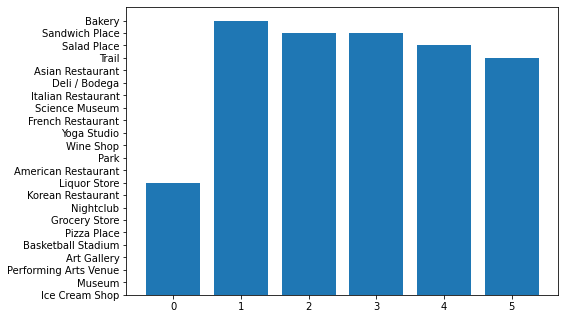

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(zip_venues_sorted['Cluster Labels'], zip_venues_sorted['1st Most Common Venue'])
plt.show()

In [25]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

zip_venues_sorted = zip_venues_sorted.astype({'Zip Code': 'int32'})
zip_venues_sorted = zip_venues_sorted.fillna(0)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(zip_venues_sorted['Latitude'], zip_venues_sorted['Longitude'], 
                                  zip_venues_sorted['Zip Code'], zip_venues_sorted['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now let's create the new dataframe and display the top 10 venues for each zip code.


### Examine all the clusters

#### Cluster 1

In [26]:
c1 = zip_venues_sorted.loc[zip_venues_sorted['Cluster Labels'] == 0, zip_venues_sorted.columns[[1] + list(range(2, zip_venues_sorted.shape[1]))]]
c1

,Longitude,Latitude,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,-118.323704,34.075327,90004,Ice Cream Shop,Sandwich Place,Yoga Studio,Concert Hall,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant
1,-118.323535,34.075836,90007,Museum,College Residence Hall,Yoga Studio,Deli / Bodega,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint
2,-118.284652,34.025655,90012,Performing Arts Venue,Art Museum,Music Venue,Concert Hall,Baseball Stadium,Theater,Park,Gym,Grocery Store,German Restaurant
3,-118.288829,34.016829,90013,Art Gallery,Bookstore,Ice Cream Shop,Home Service,Market,Mediterranean Restaurant,German Restaurant,Coffee Shop,Yoga Studio,Farmers Market
4,0.000000,0.000000,90015,Basketball Stadium,Fried Chicken Joint,Yoga Studio,Deli / Bodega,Indie Movie Theater,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant
5,-118.245179,34.055034,90016,Pizza Place,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant,Food Truck
6,-118.248886,34.056625,90017,Grocery Store,Yoga Studio,Wine Shop,Indie Movie Theater,Ice Cream Shop,Home Service,Gym,German Restaurant,Fried Chicken Joint,French Restaurant
7,-118.249284,34.055511,90019,Nightclub,Yoga Studio,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant
8,-118.250051,34.054474,90020,Korean Restaurant,Italian Restaurant,Indie Movie Theater,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant
9,-118.248354,34.057133,90023,Liquor Store,Yoga Studio,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant


#### Cluster 2

In [27]:
c2 = zip_venues_sorted.loc[zip_venues_sorted['Cluster Labels'] == 1, zip_venues_sorted.columns[[1] + list(range(2, zip_venues_sorted.shape[1]))]]
c2

,Longitude,Latitude,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,-118.267191,34.043085,91203,Bakery,Yoga Studio,Deli / Bodega,Indie Movie Theater,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint


#### Cluster 3

In [28]:
c3 = zip_venues_sorted.loc[zip_venues_sorted['Cluster Labels'] == 2, zip_venues_sorted.columns[[1] + list(range(2, zip_venues_sorted.shape[1]))]]
c3

,Longitude,Latitude,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,-118.360876,34.032693,91801,Sandwich Place,Yoga Studio,Concert Hall,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant


#### Cluster 4

In [29]:
c4 = zip_venues_sorted.loc[zip_venues_sorted['Cluster Labels'] == 3, zip_venues_sorted.columns[[1]+ list(range(2, zip_venues_sorted.shape[1]))]]
c4

,Longitude,Latitude,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,-118.259041,34.041842,91030,Sandwich Place,Yoga Studio,Concert Hall,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant


#### Cluster 5

In [30]:
c5 = zip_venues_sorted.loc[zip_venues_sorted['Cluster Labels'] == 4, zip_venues_sorted.columns[[1] + list(range(2, zip_venues_sorted.shape[1]))]]
c5

,Longitude,Latitude,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,-118.247434,34.058145,90026,American Restaurant,Taiwanese Restaurant,Restaurant,Taco Place,Massage Studio,Park,Grocery Store,German Restaurant,Fried Chicken Joint,College Residence Hall
11,-118.241164,34.074188,90027,Park,Coffee Shop,Scenic Lookout,Breakfast Spot,Amphitheater,Observatory,Wine Shop,Planetarium,Food Truck,Mediterranean Restaurant
12,-118.248741,34.050675,90028,Wine Shop,Theater,Gym,Movie Theater,Farmers Market,Concert Hall,Ice Cream Shop,Home Service,Grocery Store,German Restaurant
13,-118.249852,34.047620,90029,Yoga Studio,New American Restaurant,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant
14,-118.246359,34.048258,90031,Pizza Place,Taco Place,College Residence Hall,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant
15,-118.234801,34.046095,90036,French Restaurant,Italian Restaurant,Yoga Studio,Pizza Place,Art Museum,Breakfast Spot,Farmers Market,Flower Shop,Jazz Club,Sculpture Garden
16,-118.235473,34.046065,90037,Science Museum,Yoga Studio,Concert Hall,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant
17,-118.249835,34.047611,90038,Italian Restaurant,Indie Movie Theater,Wine Shop,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant
18,-118.236131,34.045520,90039,Wine Shop,Bakery,Mediterranean Restaurant,Sandwich Place,Café,Deli / Bodega,Ice Cream Shop,Home Service,Gym,Grocery Store
19,-118.233864,34.042538,90041,Deli / Bodega,Yoga Studio,Wine Shop,Indie Movie Theater,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint


#### Cluster 6

In [31]:
c6 = zip_venues_sorted.loc[zip_venues_sorted['Cluster Labels'] == 5, zip_venues_sorted.columns[[1] + list(range(2, zip_venues_sorted.shape[1]))]]
c6

,Longitude,Latitude,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,0.0,0.0,90068,Trail,Scenic Lookout,Music Venue,Yoga Studio,Concert Hall,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint


Lets examine all the clusters categorized by the kmeans algorithm and label each cluster

    Cluster 1: Arts and physical activities with a very few eateries mostly fast food and icecream shops
    Cluster 2: Bakery only
    Cluster 3: Sandwich place
    Cluster 4: Sandwich place
    Cluster 5: Mostly restaurants of different cuisines and some fast food restaurants and coffee shops
    Cluster 6: Trail only
    
One of the few location in Cluster 1 or Cluster 6 could be considered for our new restaurant. Based on the analysis done so far, these two clusters have minimum number of restaurants and also cluster 1 has other venues visited frquently by people. Further analysis could be done based on the distance and population age.


In [48]:
# Combine cluster 1 and cluster 6 and discard other clusters as per the analysis above

cluster_to_consider = c1.append(c6)
cluster_to_consider.dtypes
cluster_to_consider = cluster_to_consider.astype({'Zip Code': 'int64'})
cluster_to_consider

,Longitude,Latitude,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,-118.323704,34.075327,90004,Ice Cream Shop,Sandwich Place,Yoga Studio,Concert Hall,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant
1,-118.323535,34.075836,90007,Museum,College Residence Hall,Yoga Studio,Deli / Bodega,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint
2,-118.284652,34.025655,90012,Performing Arts Venue,Art Museum,Music Venue,Concert Hall,Baseball Stadium,Theater,Park,Gym,Grocery Store,German Restaurant
3,-118.288829,34.016829,90013,Art Gallery,Bookstore,Ice Cream Shop,Home Service,Market,Mediterranean Restaurant,German Restaurant,Coffee Shop,Yoga Studio,Farmers Market
4,0.000000,0.000000,90015,Basketball Stadium,Fried Chicken Joint,Yoga Studio,Deli / Bodega,Indie Movie Theater,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant
5,-118.245179,34.055034,90016,Pizza Place,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant,Food Truck
6,-118.248886,34.056625,90017,Grocery Store,Yoga Studio,Wine Shop,Indie Movie Theater,Ice Cream Shop,Home Service,Gym,German Restaurant,Fried Chicken Joint,French Restaurant
7,-118.249284,34.055511,90019,Nightclub,Yoga Studio,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant
8,-118.250051,34.054474,90020,Korean Restaurant,Italian Restaurant,Indie Movie Theater,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant
9,-118.248354,34.057133,90023,Liquor Store,Yoga Studio,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,Fried Chicken Joint,French Restaurant


In [49]:
# Lets merge the clusters chosen and the dataframe 'df' to get population, age and distance columns for further analysis

merge_df = pd.merge(df, cluster_to_consider, on='Zip Code')
merge_df = merge_df.drop(merge_df.iloc[ : , 15:], axis = 1)
merge_df

,Zip Code,Total Population,Median Age,Total Males,Total Females,Venue,categories,lat,lng,distance,Longitude,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,90004,62180,34.8,31302,30878,Larchmont Village Wine & Cheese,Sandwich Place,34.075327,-118.323704,7842,-118.323704,34.075327,Ice Cream Shop,Sandwich Place,Yoga Studio
1,90004,62180,34.8,31302,30878,Salt & Straw,Ice Cream Shop,34.075836,-118.323535,7845,-118.323704,34.075327,Ice Cream Shop,Sandwich Place,Yoga Studio
2,90007,40920,24.0,20915,20005,USC Village,College Residence Hall,34.025655,-118.284652,4966,-118.323535,34.075836,Museum,College Residence Hall,Yoga Studio
3,90007,40920,24.0,20915,20005,Natural History Museum of Los Angeles County,Museum,34.016829,-118.288829,5907,-118.323535,34.075836,Museum,College Residence Hall,Yoga Studio
4,90012,31103,36.3,19493,11610,Grand Park,Park,34.055034,-118.245179,268,-118.284652,34.025655,Performing Arts Venue,Art Museum,Music Venue
5,90012,31103,36.3,19493,11610,Dorothy Chandler Pavilion,Performing Arts Venue,34.056625,-118.248886,652,-118.284652,34.025655,Performing Arts Venue,Art Museum,Music Venue
6,90012,31103,36.3,19493,11610,Walt Disney Concert Hall,Concert Hall,34.055511,-118.249284,634,-118.284652,34.025655,Performing Arts Venue,Art Museum,Music Venue
7,90012,31103,36.3,19493,11610,The Broad,Art Museum,34.054474,-118.250051,677,-118.284652,34.025655,Performing Arts Venue,Art Museum,Music Venue
8,90012,31103,36.3,19493,11610,Los Angeles Music Center,Music Venue,34.057133,-118.248354,642,-118.284652,34.025655,Performing Arts Venue,Art Museum,Music Venue
9,90012,31103,36.3,19493,11610,Ahmanson Theatre,Theater,34.058145,-118.247434,656,-118.284652,34.025655,Performing Arts Venue,Art Museum,Music Venue


In [50]:
# Sort the dataframe by the total population to see which zip code has higher population, which could be a factor to decide the location of restaurant

sort_by_pop = merge_df.groupby(['Zip Code', 'Total Population']).count().sort_values(by = 'Total Population', ascending = False) # grouping it so that we could plot a bar graph
sort_by_pop.reset_index(inplace=True)
sort_by_pop

,Zip Code,Total Population,Median Age,Total Males,Total Females,Venue,categories,lat,lng,distance,Longitude,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,90019,64458,1,1,1,1,1,1,1,1,1,1,1,1,1
1,90004,62180,2,2,2,2,2,2,2,2,2,2,2,2,2
2,90016,47596,1,1,1,1,1,1,1,1,1,1,1,1,1
3,90023,45903,1,1,1,1,1,1,1,1,1,1,1,1,1
4,90007,40920,2,2,2,2,2,2,2,2,2,2,2,2,2
5,90020,38967,2,2,2,2,2,2,2,2,2,2,2,2,2
6,90012,31103,7,7,7,7,7,7,7,7,7,7,7,7,7
7,90017,23768,1,1,1,1,1,1,1,1,1,1,1,1,1
8,90068,22286,4,4,4,4,4,4,4,4,4,4,4,4,4
9,90015,18986,2,2,2,2,2,2,2,2,2,2,2,2,2


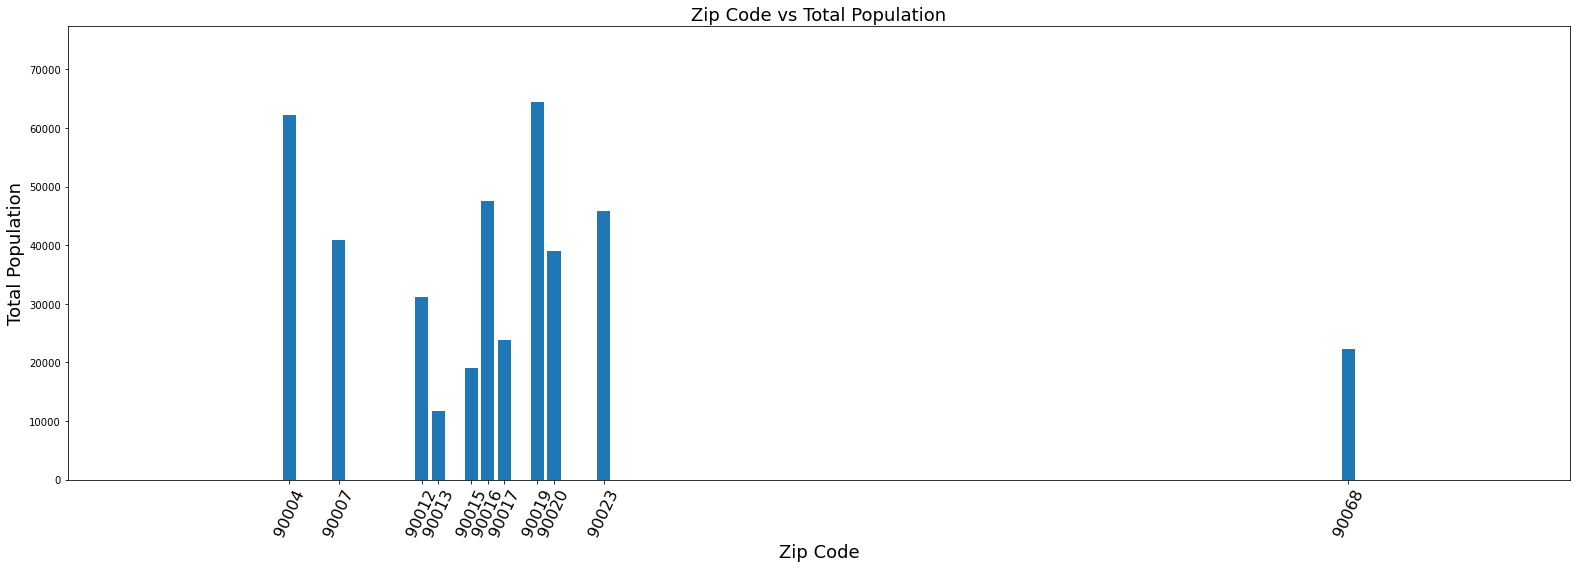

In [51]:
# Bar Plot to show the max population in the clusters chosen

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (22,8))
xAxis = sort_by_pop['Zip Code']
#print(xAxis.tolist())
yAxis = sort_by_pop['Total Population']
ax.bar(xAxis, yAxis, width=0.8)

LABELS = sort_by_pop['Zip Code']
ax.set_xticks(xAxis)
ax.set_xticklabels(LABELS, rotation = '65', fontsize = '16')
ax.margins(0.2)

#ax.title('Zip Code vs Total population')
ax.set_xlabel('Zip Code', size = 18)
ax.set_ylabel('Total Population', size = 18)
ax.set_title('Zip Code vs Total Population', size = 18)
fig.tight_layout()
plt.show()

In [52]:
# Sort the dataframe by the median age to see which zip code has younger population group, we could argue that younger population tend to visit restaurants more often than the older group.

sort_by_age = merge_df.groupby(by = ['Zip Code', 'Median Age']).count().sort_values(by = 'Median Age', ascending = True)
sort_by_age.reset_index(inplace=True)
sort_by_age

,Zip Code,Median Age,Total Population,Total Males,Total Females,Venue,categories,lat,lng,distance,Longitude,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,90007,24.0,2,2,2,2,2,2,2,2,2,2,2,2,2
1,90023,28.4,1,1,1,1,1,1,1,1,1,1,1,1,1
2,90017,29.4,1,1,1,1,1,1,1,1,1,1,1,1,1
3,90015,31.3,2,2,2,2,2,2,2,2,2,2,2,2,2
4,90016,33.9,1,1,1,1,1,1,1,1,1,1,1,1,1
5,90020,34.6,2,2,2,2,2,2,2,2,2,2,2,2,2
6,90004,34.8,2,2,2,2,2,2,2,2,2,2,2,2,2
7,90019,35.8,1,1,1,1,1,1,1,1,1,1,1,1,1
8,90012,36.3,7,7,7,7,7,7,7,7,7,7,7,7,7
9,90068,39.4,4,4,4,4,4,4,4,4,4,4,4,4,4


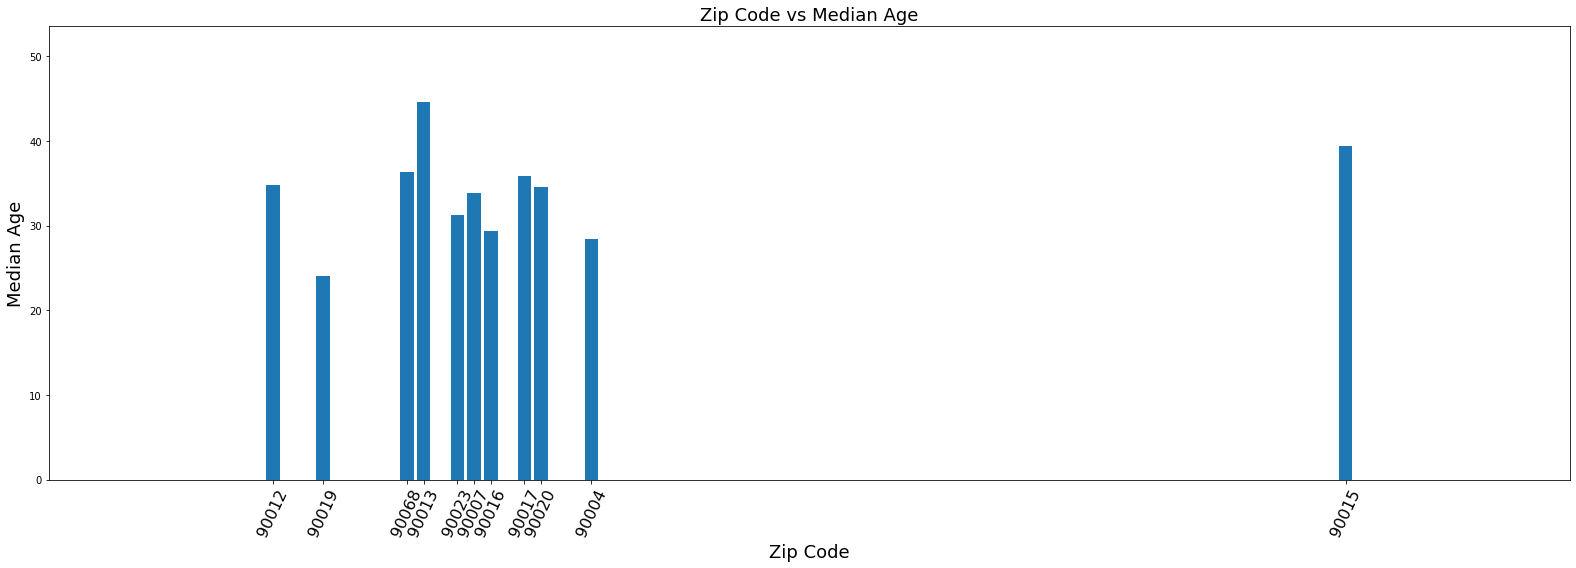

In [53]:
# Bar Plot to show the median age of the population in the clusters chosen

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (22,8))
xAxis = sort_by_age['Zip Code']
#print(xAxis.tolist())
yAxis = sort_by_age['Median Age']
ax.bar(xAxis, yAxis, width=0.8)

LABELS = sort_by_pop['Zip Code']
ax.set_xticks(xAxis)
ax.set_xticklabels(LABELS, rotation = '65', fontsize = '16')
ax.margins(0.2)

#ax.title('Zip Code vs Total population')
ax.set_xlabel('Zip Code', size = 18)
ax.set_ylabel('Median Age', size = 18)
ax.set_title('Zip Code vs Median Age', size = 18)
fig.tight_layout()
plt.show()

In [54]:
# Sort the dataframe by distance from the city center to see which zip code is closer to the city center, which could be a factor to decide the location of restaurant. 
# Closer to city center, more footfall

sort_by_dist = merge_df.groupby(['Zip Code', 'distance']).count().sort_values(by = ['distance'], ascending = True)
sort_by_dist.reset_index(inplace=True)
sort_by_dist

,Zip Code,distance,Total Population,Median Age,Total Males,Total Females,Venue,categories,lat,lng,Longitude,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,90012,268,1,1,1,1,1,1,1,1,1,1,1,1,1
1,90012,634,1,1,1,1,1,1,1,1,1,1,1,1,1
2,90012,642,1,1,1,1,1,1,1,1,1,1,1,1,1
3,90013,645,1,1,1,1,1,1,1,1,1,1,1,1,1
4,90012,652,1,1,1,1,1,1,1,1,1,1,1,1,1
5,90012,656,1,1,1,1,1,1,1,1,1,1,1,1,1
6,90012,677,1,1,1,1,1,1,1,1,1,1,1,1,1
7,90013,689,1,1,1,1,1,1,1,1,1,1,1,1,1
8,90013,939,1,1,1,1,1,1,1,1,1,1,1,1,1
9,90013,940,1,1,1,1,1,1,1,1,1,1,1,1,1


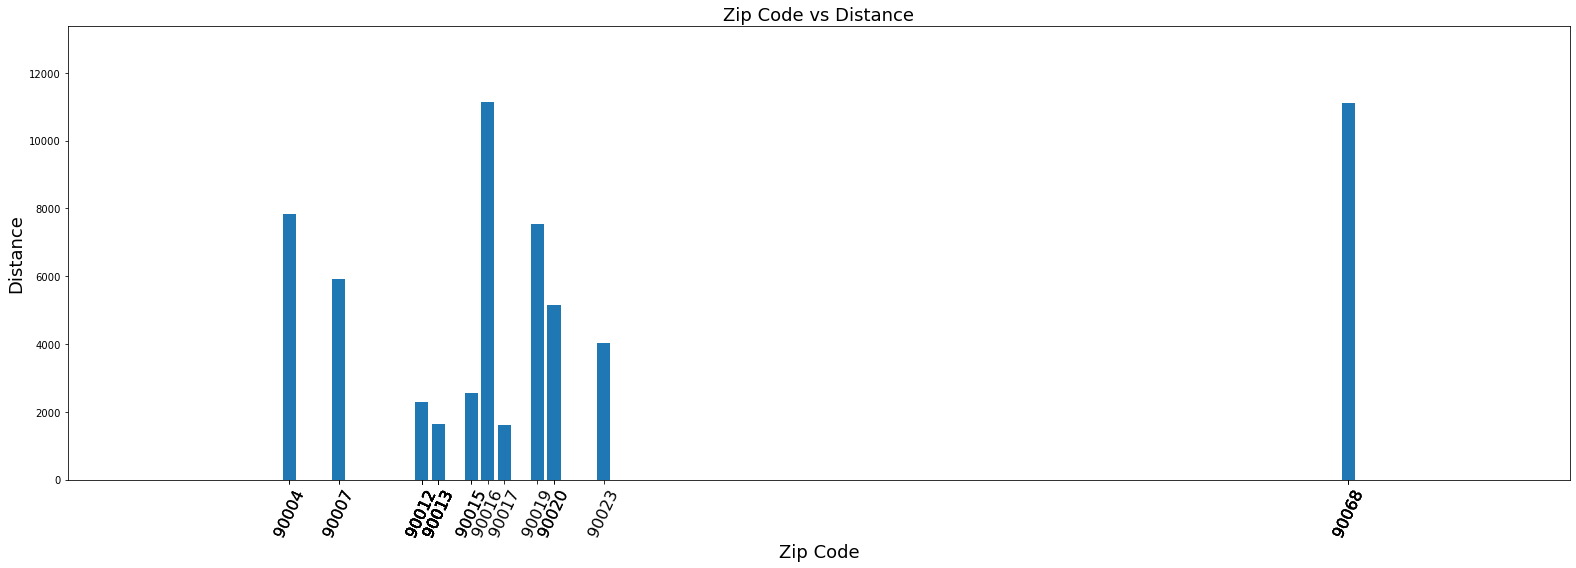

In [55]:
# Bar Plot to show the median age of the population in the clusters chosen

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (22,8))
xAxis = sort_by_dist['Zip Code']
#print(xAxis.tolist())
yAxis = sort_by_dist['distance']
ax.bar(xAxis, yAxis, width=0.8)

LABELS = sort_by_dist['Zip Code']
#print(LABELS)
ax.set_xticks(xAxis)
ax.set_xticklabels(LABELS, rotation = '65', fontsize = '16')
ax.margins(0.2)

ax.set_xlabel('Zip Code', size = 18)
ax.set_ylabel('Distance', size = 18)
ax.set_title('Zip Code vs Distance', size = 18)
fig.tight_layout()
plt.show()

In [56]:
# Get the number of venues in each zip code to know the popularity of the zip code and the probable footfall 

group_by_venue = merge_df.groupby(by = 'Zip Code').count().sort_values(by = 'Venue', ascending = False) 
group_by_venue.reset_index(inplace=True)
group_by_venue

,Zip Code,Total Population,Median Age,Total Males,Total Females,Venue,categories,lat,lng,distance,Longitude,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,90013,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1,90012,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2,90068,4,4,4,4,4,4,4,4,4,4,4,4,4,4
3,90004,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,90007,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,90015,2,2,2,2,2,2,2,2,2,2,2,2,2,2
6,90020,2,2,2,2,2,2,2,2,2,2,2,2,2,2
7,90016,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,90017,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,90019,1,1,1,1,1,1,1,1,1,1,1,1,1,1


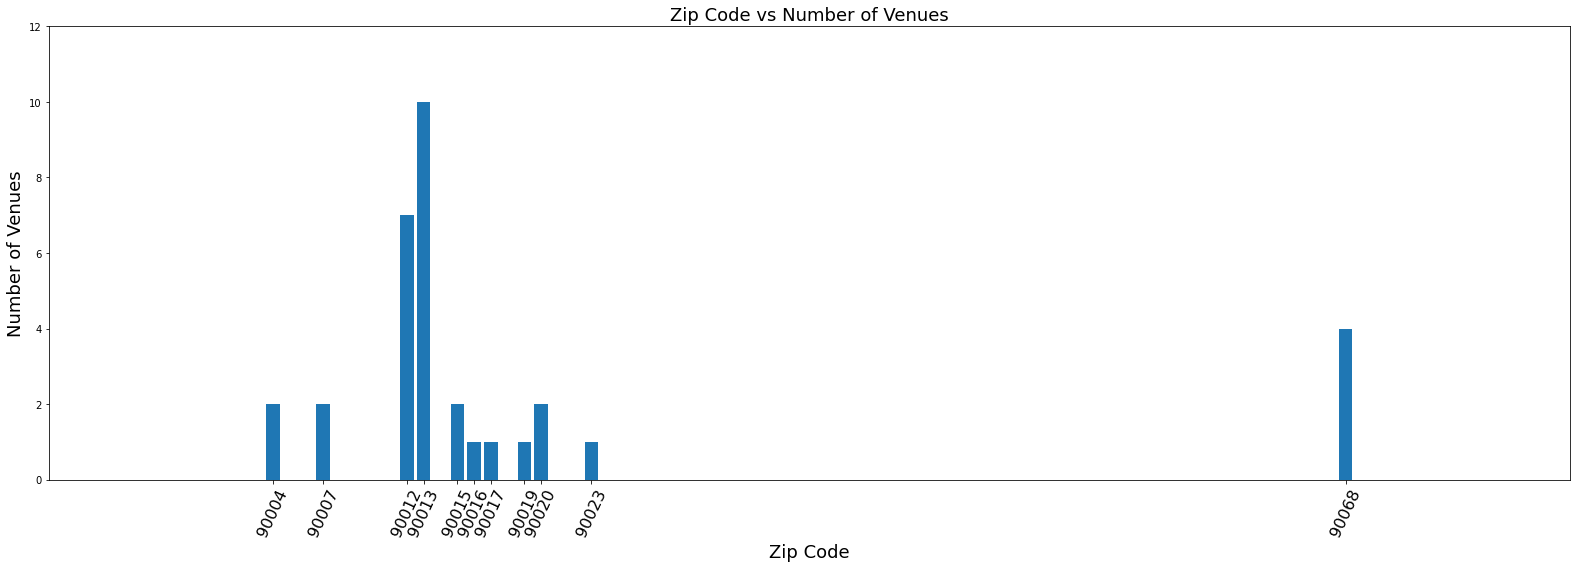

In [57]:
# Bar Plot to show the number of venues in each zip code in the clusters chosen 

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (22,8))
xAxis = group_by_venue['Zip Code']
#print(xAxis.tolist())
yAxis = group_by_venue['Venue']
ax.bar(xAxis, yAxis, width=0.8)

LABELS = group_by_venue['Zip Code']
#print(LABELS)
ax.set_xticks(xAxis)
ax.set_xticklabels(LABELS, rotation = '65', fontsize = '16')
ax.margins(0.2)

ax.set_xlabel('Zip Code', size = 18)
ax.set_ylabel('Number of Venues', size = 18)
ax.set_title('Zip Code vs Number of Venues', size = 18)
fig.tight_layout()
plt.show()

#### Conclusions

We could draw the following conclusions based on the above analysis made on the chosen cluster:

1) Bar plot for population shows that 90019, 90004, 90016, 90023, 90007 (in descending order) are zip codes which are more populous compared to the other zip codes in the cluster chosen.

2) Bar plot for median age shows that 90007, 90023, 90017, 90015, 90016 are the zip codes with lesser median age (in ascending order), which means that these are zip codes with younger population compared to all other zip codes in the chosen cluster

3) Bar plot for distance from city center shows that 90012, 90013, 90017, 90015, 90023 (in ascending order) are closer to the city center compared to all the other zip codes in the chosen cluster.

4) Bar plot for the number of venues shows that 90013, 90012, 90068, 90004, 90007 (in descending order) have more venues in the respective area compared to all the other zip codes in the chosen cluster


Based on these four analysis made above, the stakeholder take one or few or all of the results into consideration while chosing a location for his restaurant.

If we were to take distance and number of venues into consideration, few of the zip codes we could recommend are 90012, 90013.

If we were to take population and median age into consideration, few of the zip codes we could recommend are 90007, 90023, 90016

If we were to take median age and distance into consideration, few of the zip codes we could recommend are 90017, 90015, 90023.
